In [339]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [340]:
#Выгрузка всех датасетов
df1 = pd.read_excel('dataset.xlsx', sheet_name="Installs")
df2 = pd.read_excel('dataset.xlsx', sheet_name="Payments")
df3 = pd.read_excel('dataset.xlsx', sheet_name="Cost_v1")
df4 = pd.read_excel('dataset.xlsx', sheet_name="Cost_v2")

In [341]:
df1

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
0,MediaSource1,19560305480,Search,AR,True,1673554038946-5942926321601974416,8
1,MediaSource1,19560308588,Network,ZA,True,1673647857853-6408906530696604886,8
2,MediaSource1,19560305480,Search,HN,False,1673645658337-5378307560700406034,8
3,MediaSource1,19560308588,Network,FR,True,1673642511260-6240081802543562050,8
4,MediaSource1,19560308588,Network,ES,True,1673641432689-6862189683515188142,8
...,...,...,...,...,...,...,...
22411,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,MX,True,1674719459196-4736834238714043343,13
22412,MediaSource2,lQX9cNlleNjAtuzw,FYBER,CO,True,1674435130909-3001491423746308470,7
22413,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,CA,True,1673598387457-4844468922108588047,12
22414,MediaSource2,lQX9cNlleNjAtuzw,ADX,CA,True,1673747518243-268367182679887467,12


In [342]:
df2

,UserID,PaymentRevenue
0,1673672646759-6010710452938637680,5.826126
1,1673811886533-3308641358962027481,1.163525
2,1673557631838-4075714709968288531,6.056467
3,1673557631838-4075714709968288531,6.056467
4,1673713438526-5393379852337099847,3.832764
...,...,...
1575,1674898526592-5637181093880508215,13.036151
1576,1674898526592-5637181093880508215,13.036151
1577,1674898526592-5637181093880508215,13.036151
1578,1674898526592-5637181093880508215,13.036151


In [343]:
df3

,MediaSource,CampaignID,Country,Cost
0,MediaSource1,19560305480,UG,0.628868
1,MediaSource1,19560305480,MW,0.253214
2,MediaSource1,19560308588,NaN,0.840280
3,MediaSource1,19560305480,LR,0.046751
4,MediaSource1,19560308588,LK,0.858504
...,...,...,...,...
430,MediaSource1,19560308588,GE,9.921494
431,MediaSource1,19560308588,CN,15.166975
432,MediaSource1,19560305480,SB,0.011271
433,MediaSource1,19560308588,PT,22.827250


In [344]:
df4

,MediaSource,CampaignID,Channel,Cost
0,MediaSource1,19560308588,Network,2594.512900
1,MediaSource1,19560305480,Network,2661.085983
2,MediaSource1,19560308588,Search,1206.427759
3,MediaSource1,19560305480,Search,1105.145814
4,MediaSource1,19560305480,VideoNetwork,12.431458
5,MediaSource1,19560308588,VideoNetwork,86.594246
6,MediaSource2,lQX9cNlleNjAtuzw,ADCOLONY,449.972600
7,MediaSource2,lQX9cNlleNjAtuzw,ADX,504.705200
8,MediaSource2,lQX9cNlleNjAtuzw,FYBER,1022.041200
9,MediaSource2,lQX9cNlleNjAtuzw,SAMSUNG,130.362800


In [345]:
#Проведем предварительную фильрацию выборок

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22416 entries, 0 to 22415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaSource  22416 non-null  object
 1   CampaignID   22416 non-null  object
 2   Channel      22416 non-null  object
 3   Country      22409 non-null  object
 4   Wifi         22416 non-null  bool  
 5   UserID       22416 non-null  object
 6   OSVersion    22416 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 1.0+ MB


In [346]:
#Взглянем на строки с незаполненой Country

country = df1[df1['Country'].isna()]
country

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
1050,MediaSource1,19560305480,Search,NaN,True,1675101176824-4262994518422754669,8
3978,MediaSource1,19560305480,Network,NaN,False,1673807738990-4866388883058126838,12
6941,MediaSource1,19560305480,Network,NaN,True,1674846387748-896282026696201320,12
9315,MediaSource1,19560305480,Network,NaN,True,1673540819031-6681222558866070571,11
10203,MediaSource1,19560305480,Search,NaN,True,1673802978000-4503349944820336459,11
10224,MediaSource1,19560305480,Network,NaN,True,1673800784280-1506727979749670889,11
12356,MediaSource1,19560305480,Network,NaN,True,1674735731197-5012255919415776899,11


In [347]:
#Пользователи по этим строкам не участвовали в транзакциях - их можно удалить.

pd.merge(country[['UserID', 'Country']], df2, on='UserID', how='left')

,UserID,Country,PaymentRevenue
0,1675101176824-4262994518422754669,NaN,NaN
1,1673807738990-4866388883058126838,NaN,NaN
2,1674846387748-896282026696201320,NaN,NaN
3,1673540819031-6681222558866070571,NaN,NaN
4,1673802978000-4503349944820336459,NaN,NaN
5,1673800784280-1506727979749670889,NaN,NaN
6,1674735731197-5012255919415776899,NaN,NaN


In [348]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22409 entries, 0 to 22415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MediaSource  22409 non-null  object
 1   CampaignID   22409 non-null  object
 2   Channel      22409 non-null  object
 3   Country      22409 non-null  object
 4   Wifi         22409 non-null  bool  
 5   UserID       22409 non-null  object
 6   OSVersion    22409 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 1.2+ MB


In [349]:
#Взглянем, есть ли дублирующиеся строки

df1['UserID'].nunique()

22408

In [350]:
#Взглянем на дублирующуюся строку

df1[df1.duplicated(['UserID'], keep=False)]

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
4256,MediaSource1,19560305480,Search,PH,True,1673754335551-1631938729344755808,12
5019,MediaSource1,19560305480,Search,PH,True,1673754335551-1631938729344755808,12


In [351]:
#Участвовал ли этот пользователь в транзакциях

df2.loc[(df2['UserID'] == '1673754335551-1631938729344755808')]

,UserID,PaymentRevenue


In [352]:
# Данный пользователь не участвовал в транзакциях, так что его дубликат можно удалить.

df1 = df1.drop_duplicates(subset='UserID')

In [353]:
df1.loc[(df1['UserID'] == '1673754335551-1631938729344755808')]

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
4256,MediaSource1,19560305480,Search,PH,True,1673754335551-1631938729344755808,12


In [354]:
df1[df1.duplicated(['UserID'], keep=False)]

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion


### 1. Расчёт CPI и ROAS для каждого источника трафика



In [355]:
# Для CPI делим стоимость кампании в разрезе каналов на кол-во установок в аналогичном разрезе.

# Расчет кол-ва установок по каналам
count = df1.groupby('Channel').count()
result = count[['CampaignID']]

# Расчет суммы трат по каналам
summ = df4[['Channel', 'Cost']].groupby('Channel').sum()

# Соединение двух последних датафреймов по столбцу каналов
merged_df = pd.merge(result, summ, on='Channel')

# Расчет CPI (Стоимость рекламы по каналам на кол-во установок по этим каналам)
merged_df['CPI'] = merged_df['Cost'] / merged_df['CampaignID']
CPI = pd.DataFrame(merged_df)
CPI = CPI.rename(columns={'CampaignID': 'Install amount'})
CPI = CPI.sort_values(by='CPI')
CPI

,Install amount,Cost,CPI
Channel,,,
Search,6339,2311.573573,0.364659
Network,13319,5255.598883,0.394594
PUBMATIC,3,5.463000,1.821000
VideoNetwork,51,99.025704,1.941680
SAMSUNG,60,130.362800,2.172713
APS,26,75.718400,2.912246
NAVER,1,3.530800,3.530800
APPLOVIN,567,2351.198800,4.146735
IRONSOURCE,912,3789.683900,4.155355


In [356]:
# Для ROAS Нужно выяснить сколько для каждого источника трафика было привлечено клиентов и сколько они потратили.

# Соединение таблиц покупок пользователей и установок, чтобы достать столбец каналов
merged_df = pd.merge(df1, df2, on='UserID')[['Channel', 'PaymentRevenue']]

# Сумма покупок пользователей по каналам
merged_df = merged_df.groupby('Channel').sum()

# Сумма трат по каналам
count = df4[['Channel', 'Cost']].groupby('Channel').sum()

# Слияние датафреймов с тратами и покупками пользователей по каналам
merged_df = pd.merge(merged_df, count, on='Channel')

# Расчет ROAS (Покупки пользователей на траты по каналам)
merged_df['ROAS, %'] = merged_df['PaymentRevenue'] / merged_df['Cost'] * 100
ROAS = pd.DataFrame(merged_df)
ROAS.sort_values(by='ROAS, %')

,PaymentRevenue,Cost,"ROAS, %"
Channel,,,
FYBER,92.810000,1022.041200,9.080847
VideoNetwork,10.515286,99.025704,10.618744
TAPJOY,44.890000,337.859900,13.286572
ADX,67.880000,504.705200,13.449435
CHARTBOOST,33.960000,241.751400,14.047488
ADCOLONY,65.850000,449.972600,14.634224
UNITY,551.077672,2238.395200,24.619320
APS,19.970000,75.718400,26.374039
IRONSOURCE,1536.537725,3789.683900,40.545274


In [481]:
dff = df1[df1['Channel'] == 'PUBMATIC']
dff

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
19718,MediaSource2,lQX9cNlleNjAtuzw,PUBMATIC,US,True,1673922225341-1149308068658757168,12
19720,MediaSource2,lQX9cNlleNjAtuzw,PUBMATIC,US,False,1674898526592-5637181093880508215,11
21773,MediaSource2,lQX9cNlleNjAtuzw,PUBMATIC,US,True,1673291043666-7397060867527751436,13


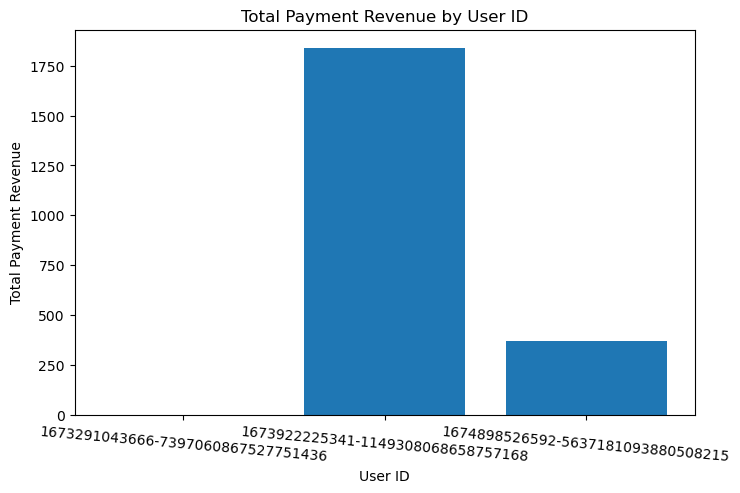

In [482]:
dff2 = pd.merge(dff, df2, on='UserID', how='left')
dff3 = dff2.groupby('UserID')['PaymentRevenue'].sum()
a = dff3.index.tolist()
b = dff3.tolist()

plt.figure(figsize=(8, 5))
plt.bar(a, b)

plt.xlabel('User ID')
plt.ylabel('Total Payment Revenue')
plt.title('Total Payment Revenue by User ID')
plt.xticks(rotation=355)
plt.show()

PUBMATIC - выбросный канал. Стоит учитывать в будущем. Он находится в США. И там есть пользователь, который решил стать китом с такими транзакциями. Удалять я его не буду, у США - большой отрыв по пользователям в данной выборке. Такой пользователь - следствие.

#### 2. Для MediaSource2 рассчитайте конверсию в платящего для пользователей, установивших приложение через Wi-Fi и без него. Достаточно ли данных, чтобы с 95% вероятностью утверждать, что влияние наличия Wi-Fi имеет влияние на конверсию в платящего? Обоснуйте.

In [357]:
# Для расчета конверсии платящего необходимо рассчитать кол-во пользователей, установивших приложение через Wi-Fi и без него

# Строки пользователей, скачивающих через Wi-Fi и без него
wifi = df1.loc[(df1['Wifi'] == True) & (df1['MediaSource'] == 'MediaSource2')]
nowifi = df1.loc[(df1['Wifi'] == False) & (df1['MediaSource'] == 'MediaSource2')]

In [358]:
wifi

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
19717,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,US,True,1673670959707-4461760122653175614,12
19718,MediaSource2,lQX9cNlleNjAtuzw,PUBMATIC,US,True,1673922225341-1149308068658757168,12
19719,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,US,True,1674391335386-4168247061511941295,12
19721,MediaSource2,lQX9cNlleNjAtuzw,INMOBI,US,True,1674340683057-8273698982669744959,10
19722,MediaSource2,lQX9cNlleNjAtuzw,FYBER,VN,True,1672723747046-5361046711188364305,9
...,...,...,...,...,...,...,...
22410,MediaSource2,lQX9cNlleNjAtuzw,FYBER,MX,True,1674613963468-7244859767780926397,12
22411,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,MX,True,1674719459196-4736834238714043343,13
22412,MediaSource2,lQX9cNlleNjAtuzw,FYBER,CO,True,1674435130909-3001491423746308470,7
22413,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,CA,True,1673598387457-4844468922108588047,12


In [359]:
nowifi

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
19720,MediaSource2,lQX9cNlleNjAtuzw,PUBMATIC,US,False,1674898526592-5637181093880508215,11
19727,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,US,False,1672591307065-7747672936531458663,9
19729,MediaSource2,lQX9cNlleNjAtuzw,ADX,US,False,1672681935436-442186516510421132,9
19735,MediaSource2,lQX9cNlleNjAtuzw,INMOBI,US,False,1672723675826-3388476296950136523,9
19754,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,US,False,1673267029436-2397810940535222154,9
...,...,...,...,...,...,...,...
22392,MediaSource2,lQX9cNlleNjAtuzw,FYBER,US,False,1674785203486-4681526516431426669,7
22394,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,US,False,1672753913907-4548832110673432638,7
22401,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,US,False,1674114339859-3603234515028807846,8
22403,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,US,False,1674836380753-8979378413452612436,8


In [360]:
# Левым джойном присоединим по UserID выборки: wifi с выборкой транзакций пользователей и nowifi с выборкой транзакций 
# пользователей

# Датафрейм с транзакциями рассматриваю без дубликатов, потому что интересен факт единственной покупки уникального пользователя.
wifi2 = pd.merge(wifi, df2.drop_duplicates('UserID'), on='UserID', how='left')
nowifi2 = pd.merge(nowifi, df2.drop_duplicates('UserID'), on='UserID', how='left')

# Выясним какова пропорция кол-ва платящих от кол-ва установивших приложение с Wi-Fi и без него.
wifi3 = wifi2[['PaymentRevenue']].count()
nowifi3 = nowifi2[['PaymentRevenue']].count()


print(int(wifi3), ' - Транзакций пользователей Wi-Fi из ', wifi.drop_duplicates('UserID')['UserID'].count(), ' пользователей, скачавших по Wi-Fi')
print(int(nowifi3), ' - Транзакций пользователей no-Wi-Fi ', nowifi.drop_duplicates('UserID')['UserID'].count(), ' пользователей, скачавших не по Wi-Fi')

104  - Транзакций пользователей Wi-Fi из  1711  пользователей, скачавших по Wi-Fi
72  - Транзакций пользователей no-Wi-Fi  988  пользователей, скачавших не по Wi-Fi


In [361]:
# Конверсия платящих пользователей ниже:

print('Для Wi-Fi:     {:.2f}%'.format(int(wifi3) / wifi.drop_duplicates('UserID')['UserID'].count() * 100))
print('Для не Wi-Fi:  {:.2f}%'.format(int(nowifi3) / nowifi.drop_duplicates('UserID')['UserID'].count() * 100))

Для Wi-Fi:     6.08%
Для не Wi-Fi:  7.29%


In [362]:
# Для ответа на второй вопрост проведем двустронний z-test

# H0: доли конверсий двух групп равны
# H1: доли конверсий двух групп не равны

from statsmodels.stats.proportion import proportions_ztest

successes = [104, 72]
trials = [1711, 988]

z_stat, pval = proportions_ztest(successes, trials, alternative='two-sided')

print('p-value = {:.4f}'.format(pval))

if pval < 0.05:
    print("Отвергаем нулевую гипотезу, принимаем альтернативную - наличие Wi-Fi имеет влияние на конверсию в платящего с точностью 95%")
else:
    print("Принимаем нулевую гипотезу - с точностью 95% нельзя утверждать, что Wi-Fi имеет влияния на конверсию в платящего")

p-value = 0.2203
Принимаем нулевую гипотезу - с точностью 95% нельзя утверждать, что Wi-Fi имеет влияния на конверсию в платящего


3. Выработайте ряд рекомендаций для оптимизации рекламных кампаний, считайте, что ограничений на
оптимизацию нет, ваша цель - поднять прибыльность и эффективность маркетинговых кампаний на текущих
источниках.

       Для ответа на поставленный выше вопрос, желательно визуализировать актуальные метрики.
1. Каналы продаж<br>
2. Страны<br>
3. PaymentRevenue<br>
4. Рекламные компании<br>

In [363]:
df1

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion
0,MediaSource1,19560305480,Search,AR,True,1673554038946-5942926321601974416,8
1,MediaSource1,19560308588,Network,ZA,True,1673647857853-6408906530696604886,8
2,MediaSource1,19560305480,Search,HN,False,1673645658337-5378307560700406034,8
3,MediaSource1,19560308588,Network,FR,True,1673642511260-6240081802543562050,8
4,MediaSource1,19560308588,Network,ES,True,1673641432689-6862189683515188142,8
...,...,...,...,...,...,...,...
22411,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,MX,True,1674719459196-4736834238714043343,13
22412,MediaSource2,lQX9cNlleNjAtuzw,FYBER,CO,True,1674435130909-3001491423746308470,7
22413,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,CA,True,1673598387457-4844468922108588047,12
22414,MediaSource2,lQX9cNlleNjAtuzw,ADX,CA,True,1673747518243-268367182679887467,12


In [364]:
# Соберем большой датафрейм для удобства анализа.

df = pd.merge(df1, df2.drop_duplicates('UserID'), on='UserID', how='left')
df

,MediaSource,CampaignID,Channel,Country,Wifi,UserID,OSVersion,PaymentRevenue
0,MediaSource1,19560305480,Search,AR,True,1673554038946-5942926321601974416,8,NaN
1,MediaSource1,19560308588,Network,ZA,True,1673647857853-6408906530696604886,8,NaN
2,MediaSource1,19560305480,Search,HN,False,1673645658337-5378307560700406034,8,NaN
3,MediaSource1,19560308588,Network,FR,True,1673642511260-6240081802543562050,8,NaN
4,MediaSource1,19560308588,Network,ES,True,1673641432689-6862189683515188142,8,NaN
...,...,...,...,...,...,...,...,...
22403,MediaSource2,lQX9cNlleNjAtuzw,APPLOVIN,MX,True,1674719459196-4736834238714043343,13,NaN
22404,MediaSource2,lQX9cNlleNjAtuzw,FYBER,CO,True,1674435130909-3001491423746308470,7,NaN
22405,MediaSource2,lQX9cNlleNjAtuzw,IRONSOURCE,CA,True,1673598387457-4844468922108588047,12,NaN
22406,MediaSource2,lQX9cNlleNjAtuzw,ADX,CA,True,1673747518243-268367182679887467,12,NaN


In [365]:
dfs = df.groupby('Channel')['PaymentRevenue'].sum()
dfc = df.groupby('Channel')['PaymentRevenue'].count()

In [366]:
# Джойним датафреймы

df = pd.merge(dfs, dfc, on='Channel', how='inner')
df = pd.merge(df, summ, on='Channel', how='inner')
df.columns = 'OverallPay', 'CountPay', 'AdsCost'
df['MidPay'] = df['OverallPay']/df['CountPay']
users = pd.DataFrame(df1.groupby('Channel')['UserID'].count())
df = pd.merge(df, users, on='Channel', how='left')
df = df.rename(columns={'UserID': 'Users'})
df = df[['AdsCost', 'OverallPay', 'MidPay', 'CountPay', 'Users']]

In [367]:
# Таблица ниже: OverallPay - сколько в валюте пользователи совершили покупок по каналам.
#               CountPay - сколько ксего было покупок
#               AdsCost - траты на рекламу по каналам
#               MidPay - средняя покупка в валюте
#               Users - количество пользователей

df

,AdsCost,OverallPay,MidPay,CountPay,Users
Channel,,,,,
ADCOLONY,449.972600,25.930000,3.704286,7,58
ADX,504.705200,24.930000,3.561429,7,77
APPLOVIN,2351.198800,240.660000,7.078235,34,567
APPODEAL,74.863100,9.990000,9.990000,1,17
APS,75.718400,14.980000,7.490000,2,26
CHARTBOOST,241.751400,3.980000,1.990000,2,27
FYBER,1022.041200,28.940000,4.823333,6,202
INMOBI,622.110900,67.931823,5.660985,12,116
IRONSOURCE,3789.683900,339.875183,5.962723,57,912


Стоит отметить, что рассмотрение канала с менее, чем 100 пользователей не имеет смысла из-за недостатка информации (по-хорошему стоит еще сильнее ограничить рассматриваемую выборку, но тогда не останется строк).

In [368]:
#Уберем строки, где меньше сотни пользователей

df = df[df['Users'] > 100]

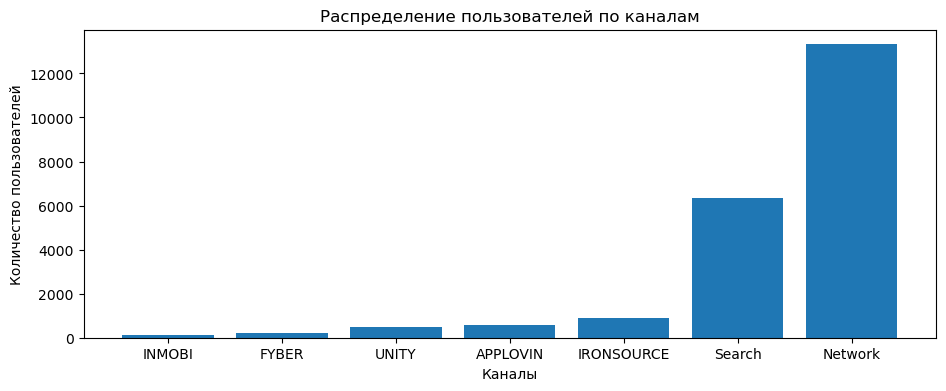

In [369]:
channel = df.index.tolist()
user = df['Users'].tolist()
# Сортируем DataFrame по столбцу 'Users' по возрастанию
sorted_df = df.sort_values('Users', ascending=True)

# Получаем отсортированные списки каналов и пользователей
sorted_channel = sorted_df.index.tolist()
sorted_user = sorted_df['Users'].tolist()

# Построение гистограммы с отсортированными данными
plt.figure(figsize=(11, 4))
plt.bar(sorted_channel, sorted_user)

# Настройка осей
plt.xlabel('Каналы')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по каналам')
plt.xticks(rotation=0)
plt.show()

##### Заметно, что через Search и Network приходит подавляющее число User, приэтом CPI там самый невысокий, что хорошо. Соответственно, константно аудиторию стоит привлекать именно через эти каналы.

In [370]:
CPI[CPI['Install amount']>100]

,Install amount,Cost,CPI
Channel,,,
Search,6339,2311.573573,0.364659
Network,13319,5255.598883,0.394594
APPLOVIN,567,2351.198800,4.146735
IRONSOURCE,912,3789.683900,4.155355
UNITY,503,2238.395200,4.450090
FYBER,202,1022.041200,5.059610
INMOBI,116,622.110900,5.363025


CPI для остальных каналов черезмерно высок, в сравнении с Search и Network. Рассматривать прочие каналы с точки зрения прироста числа пользователей не имеет смысла.

In [371]:
#Взглянем, стоит ли в дальнейшем использовать оставшиеся из списка выше каналы.

ROASmean = (ROAS.reset_index()[ROAS.reset_index()['Channel'] != 'PUBMATIC']['PaymentRevenue'].sum())/ROAS.reset_index()['Cost'].sum() * 100
print("    {:.3}% - средний ROAS без выбросного PUBMATIC".format(ROASmean))
pd.merge(df.reset_index()[df.reset_index()['Users']<5000], ROAS.reset_index()[['Channel', 'ROAS, %']], on='Channel', how='left')

    48.4% - средний ROAS без выбросного PUBMATIC


,Channel,AdsCost,OverallPay,MidPay,CountPay,Users,"ROAS, %"
0,APPLOVIN,2351.1988,240.660000,7.078235,34,567,48.821903
1,FYBER,1022.0412,28.940000,4.823333,6,202,9.080847
2,INMOBI,622.1109,67.931823,5.660985,12,116,64.969661
3,IRONSOURCE,3789.6839,339.875183,5.962723,57,912,40.545274
4,UNITY,2238.3952,169.208080,6.043146,28,503,24.619320


Если приток пользователей небольшой, тот или иной канал стоит спонсировать, если есть излишки бюджета, которые уже не может "скушать" канал с более высоким ROAS или же, если тенденция прироста пользователей с того или иного канала идет на спад, либо, если этот самый ROAS относительно высок. В данной выборке (если считать её достоверной в силу малого числа рассматриваемых пользователей) - выдающихся ROAS нет. Не стоит рассчитывать на сверхвыгоду, но если и рассматривать лишние ресурсы, то те, у которых средний ROAS - выше.

In [372]:
#Стоит отметить, что я не вижу в этом большого смысла, так как ROAS у Search и Network ROAS 62% и 67% соответственно:

ROAS.reset_index()[(ROAS.reset_index()['Channel'] == 'Search') | (ROAS.reset_index()['Channel'] == 'Network')]

,Channel,PaymentRevenue,Cost,"ROAS, %"
9,Network,3538.226703,5255.598883,67.322997
12,Search,1428.595581,2311.573573,61.801865


In [373]:
#Вывод: бюджет стоит тратить в первую очерередь на каналы ниже:

final = pd.merge(ROAS, CPI, on='Channel', how='left')
final = final[['ROAS, %', 'CPI']]
final[(final['ROAS, %'] > 70) | (final['CPI'] < 1)]

,"ROAS, %",CPI
Channel,,
APPODEAL,224.209257,4.403712
Network,67.322997,0.394594
PUBMATIC,40402.764983,1.821000
SAMSUNG,110.246175,2.172713
Search,61.801865,0.364659
VUNGLE,96.146369,5.178216


Однако, стоит учитывать, что со временем возможно изменение в динамике. Поэтому  небольшую часть бюджета стоит тратить на рекламу в каждый из каналов для того, чтобы иметь статистику увеличения количества пользователей в зависимости от того или иного канала и вовремя поднять бюджет на какой-нибудь резко растущий канал или же наоборот - снизить на падающий.

In [429]:
#Взглянем на страны и стоимость рекламы по этим странам:

df = pd.merge(df1, df2.drop_duplicates('UserID'), on='UserID', how='left')
count = pd.DataFrame(df.groupby('Country')['UserID'].count())
sum = pd.DataFrame(df.groupby('Country')['PaymentRevenue'].sum())
country = pd.DataFrame(df3.groupby('Country')['Cost'].sum())
country = pd.merge(pd.merge(country, count, on='Country', how='left'), sum, on='Country', how='left')

In [430]:
country = country.rename(columns={'UserID': 'Users', 'PaymentRevenue': 'UsersTransactions'})
country = country.sort_values(by='Cost')

Выясним в какой стране исследуемый продукт популярен относительно потраченной стоимости Cost и взглянем на топов по UserTransactions относительно Cost и Users

In [431]:
country['CostToHire'] = country['Cost']/country['Users']
country['MoneyPerUser'] = country['UsersTransactions']/country['Users']

In [445]:
countryC = country.sort_values(by=['CostToHire'], ascending=False)
countryC = countryC[countryC['Users']>100]
countryC['M/C'] = countryC['MoneyPerUser'] / countryC['CostToHire']
A = countryC.sort_values(by='M/C', ascending=False).head(20)
A

,Cost,Users,UsersTransactions,CostToHire,MoneyPerUser,M/C
Country,,,,,,
DO,16.803419,106.0,13.182434,0.158523,0.124363,0.784509
PL,234.396100,574.0,135.999042,0.408356,0.236932,0.580210
MX,212.014036,1037.0,121.471573,0.204449,0.117137,0.572941
UY,28.893325,157.0,16.190000,0.184034,0.103121,0.560337
CZ,130.855016,273.0,66.173329,0.479322,0.242393,0.505700
CL,170.504105,585.0,85.818537,0.291460,0.146698,0.503322
EC,16.014032,120.0,7.980000,0.133450,0.066500,0.498313
IT,161.291367,277.0,69.084604,0.582279,0.249403,0.428322
MD,22.913835,123.0,9.475893,0.186291,0.077040,0.413545


В топе выше в столбце M/C указаны страны, в которых по данным датафрейма меньшая стоимость рекламы привлечет большее количество денег в качестве транзакций. Порог в группу я установил - 100 юзеров и вывел топ 20 стран. Меньше я посчитал некорректным для рассмотрения (для большей достоверности хорошо бы еще увеличить порог входа, но тогда будет мало строк). <br>
В топе ниже - наиболее платежеспособные страны с идентичной фильтрацией. Не стоит забывать, что реклама дороже в той стране, где живет более платежеспособный гражданин.

In [448]:
B = countryC.sort_values(by='MoneyPerUser', ascending=False).head(20)
B

,Cost,Users,UsersTransactions,CostToHire,MoneyPerUser,M/C
Country,,,,,,
KR,848.427250,363.0,169.034486,2.337265,0.465660,0.199233
US,12798.610927,3002.0,1192.967760,4.263361,0.397391,0.093211
IT,161.291367,277.0,69.084604,0.582279,0.249403,0.428322
CZ,130.855016,273.0,66.173329,0.479322,0.242393,0.505700
PL,234.396100,574.0,135.999042,0.408356,0.236932,0.580210
DE,396.037768,388.0,71.828795,1.020716,0.185126,0.181369
FR,560.028541,591.0,100.262331,0.947595,0.169649,0.179031
CL,170.504105,585.0,85.818537,0.291460,0.146698,0.503322
MY,89.128742,166.0,23.261461,0.536920,0.140129,0.260987
